# 3.2 Introduction

# 3.3 Imports

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from scipy import signal

pd.set_option("display.precision", 8)

# 3.4 Load The Data

## 3.4.1 load features

In [12]:
train_df = pd.read_pickle('../data/train_df.pkl')
# train_df.head().T
train_features_df.drop(columns = 'ttf_avg', inplace = True)
train_features_df.head().T

,0,1,2,3,4
mean,4.88411333e+00,4.74680000e+00,4.72576667e+00,4.75300000e+00,4.90639333e+00
median,5.00000000e+00,5.00000000e+00,5.00000000e+00,5.00000000e+00,5.00000000e+00
std,5.10110613e+00,6.17338350e+00,6.58882378e+00,5.71503591e+00,6.96739703e+00
kurt,3.36624813e+01,1.16797377e+02,9.87585172e+01,3.37447792e+01,3.35552114e+01
skew,-2.40611666e-02,5.26283584e-01,3.90560504e-01,-1.07663783e-01,2.17390561e-01
...,...,...,...,...,...
fft_imag_max,2.34327194e+04,2.47010005e+04,2.72361806e+04,2.71625783e+04,3.00734971e+04
fft_imag_qt25,-4.82489889e+02,-4.96772610e+02,-4.98116853e+02,-4.89989514e+02,-5.04606183e+02
fft_imag_qt75,4.82489889e+02,4.96772610e+02,4.98116853e+02,4.89989514e+02,5.04606183e+02
fft_imag_iqr,9.64979778e+02,9.93545220e+02,9.96233707e+02,9.79979028e+02,1.00921237e+03


# 3.5 Explore The Data

### 3.5.1 Principal component analysis

In [13]:
train_features_scale = scale(train_features_df)
columns = train_features_df.columns
train_features_scale_df = pd.DataFrame(train_features_scale, columns=columns)
train_features_scale_df.head()


C:\anaconda\lib\site-packages\sklearn\preprocessing\_data.py:239: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn(


,mean,median,std,kurt,skew,min,max,qt25,qt75,iqr,...,fft_imag_median,fft_imag_std,fft_imag_kurt,fft_imag_skew,fft_imag_min,fft_imag_max,fft_imag_qt25,fft_imag_qt75,fft_imag_iqr,fft_imag_abs_sum
0,1.42431580,0.9541381,-0.17069508,-0.49047637,-0.31190575,0.19354066,-0.21819804,1.59841954,0.287461,-0.92074487,...,0.63472388,-0.16951701,0.44972997,2.81213664e-17,0.08602942,-0.08602942,0.44634892,-0.44634892,-0.44634892,-0.17646303
1,0.88814019,0.9541381,-0.04485562,0.68990288,0.83951338,-0.01752686,0.06356949,-0.39730607,0.287461,0.46589010,...,0.69948813,-0.04348758,0.25129844,2.98963482e-18,0.04352780,-0.04352780,-0.20689900,0.20689900,0.20689900,-0.03453586
2,0.80601007,0.9541381,0.00389929,0.43378063,0.55555655,-0.01752686,0.06356949,-0.39730607,0.287461,0.46589010,...,0.89378088,0.00639008,0.70930554,-6.18116568e-17,-0.04142913,0.04142913,-0.26838058,0.26838058,0.26838058,0.00557162
3,0.91234970,0.9541381,-0.09864601,-0.48930788,-0.48681730,0.12946659,-0.19258281,-0.39730607,0.287461,0.46589010,...,-0.07768285,-0.09883241,0.94766792,-5.26096038e-17,-0.03896263,0.03896263,0.10333904,-0.10333904,-0.10333904,-0.11087586
4,1.51131386,0.9541381,0.04832758,-0.49199943,0.19325422,0.16338816,-0.08646257,-0.39730607,0.287461,0.46589010,...,0.37566689,0.05392132,0.77282449,3.91185242e-17,-0.13651102,0.13651102,-0.56518264,0.56518264,0.56518264,0.05821839


In [14]:
train_features_scale_df.std(ddof = 0)

mean                1.0
median              1.0
std                 1.0
kurt                1.0
skew                1.0
                   ... 
fft_imag_max        1.0
fft_imag_qt25       1.0
fft_imag_qt75       1.0
fft_imag_iqr        1.0
fft_imag_abs_sum    1.0
Length: 168, dtype: float64

In [15]:
train_pca = PCA().fit(train_features_scale)


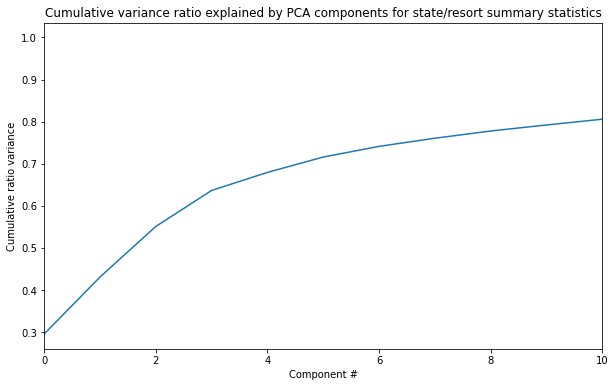

In [17]:
#Call the `cumsum()` method on the 'explained_variance_ratio_' attribute of `state_pca` and
#create a line plot to visualize the cumulative explained variance ratio with number of components
#Set the xlabel to 'Component #', the ylabel to 'Cumulative ratio variance', and the
#title to 'Cumulative variance ratio explained by PCA components for state/resort summary statistics'
#Hint: remember the handy ';' at the end of the last plot call to suppress that untidy output
plt.subplots(figsize=(10, 6))
plt.plot(train_pca.explained_variance_ratio_.cumsum())
plt.xlabel('Component #')
plt.ylabel('Cumulative ratio variance')
plt.xlim((0,10))
plt.title('Cumulative variance ratio explained by PCA components for state/resort summary statistics');

In [19]:
#Call `state_pca`'s `transform()` method, passing in `state_summary_scale` as its argument
train_pca_x = train_pca.transform(train_features_scale)

In [20]:
train_pca_x.shape

(8356, 168)

In [21]:
pca_df = pd.DataFrame({'PC1': train_pca_x[:, 0], 'PC2': train_pca_x[:, 1],'PC3': train_pca_x[:,2]})
pca_df.head()

,PC1,PC2,PC3
0,-2.13041055,6.43143184,-1.08516059
1,1.32988388,4.39656522,1.36307883
2,2.25636070,3.40157940,-2.10484652
3,-0.08549018,3.51620072,-4.71253700
4,3.17266310,5.02310109,-6.66914438


In [34]:
pca_contribution = pd.DataFrame(train_pca.components_, columns=columns).sum().sort_values(ascending = False)
pos_features = pca_contribution.head(6).index.tolist()
neg_features = pca_contribution.tail(6).index.tolist()
print(pca_contribution)

rol500_kurt_skurt       2.84983255
rol1000_mean_smean      2.48347432
rol50_kurt_smean        2.34838754
rol100_kurt_skurt       2.17626816
rol5000_kurt_smedian    2.09191006
                           ...    
rol100_std_smean       -1.86558518
rol1000_std_skurt      -1.98270878
rol500_mean_sskew      -2.04982277
fft_real_max           -2.29403505
rol5000_skew_sstd      -2.43904775
Length: 168, dtype: float64
['rol500_kurt_skurt', 'rol1000_mean_smean', 'rol50_kurt_smean', 'rol100_kurt_skurt', 'rol5000_kurt_smedian', 'rol100_std_smean', 'rol1000_std_skurt', 'rol500_mean_sskew', 'fft_real_max', 'rol5000_skew_sstd']


### 3.5.2 Scatterplot EDA 

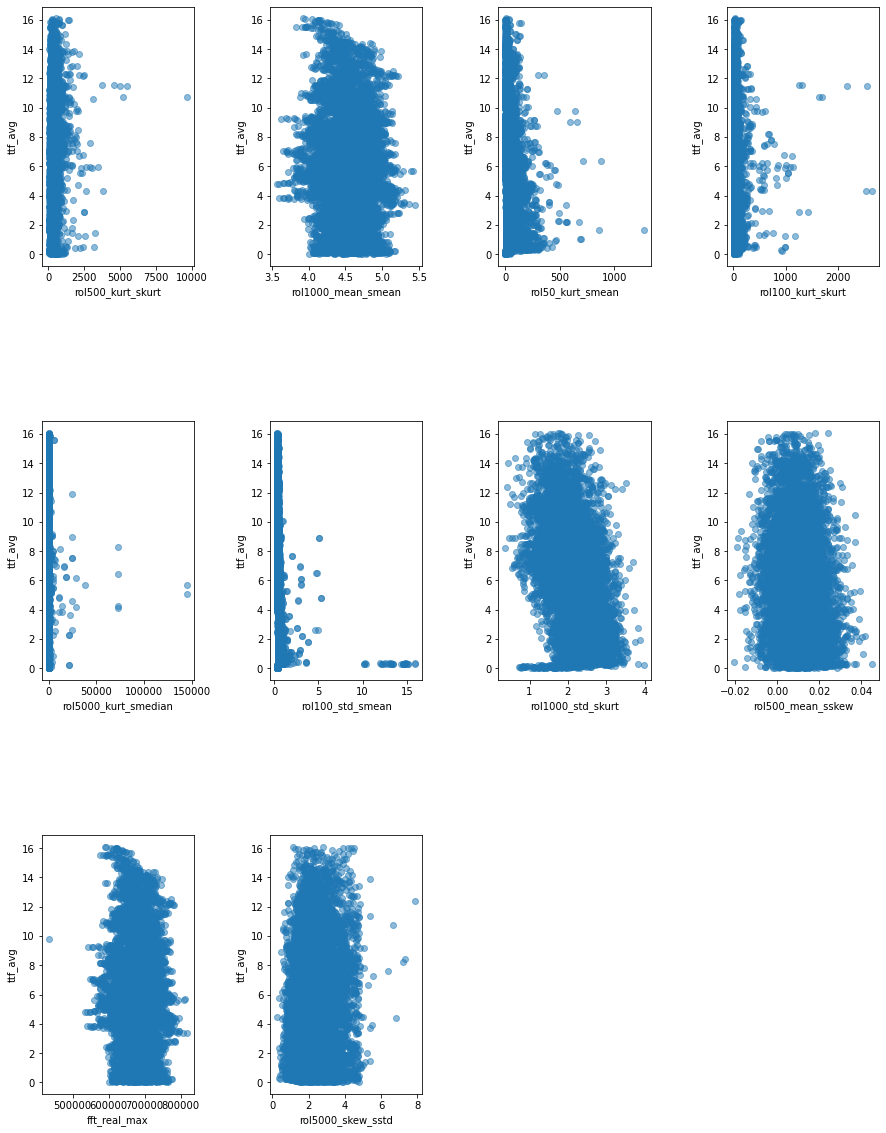

In [37]:
scatterplots(train_df, pos_features + neg_features, ncol=4, figsize=(15, 20))